In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the dataset
df = pd.read_csv("student_sleep_deprivation_dataset.csv")
df

,sleep_hours,study_hours,screen_time_hours,physical_activity_mins,caffeine_cups,mood_score,wake_up_time_hour,sleep_deprived
0,7.2,5.9,9.5,45,1,Low,16,No
1,6.3,7.8,8.3,18,1,Medium,17,Yes
2,7.5,1.2,6.1,13,2,Medium,16,No
3,8.8,5.1,4.4,29,2,Low,15,No
4,6.1,2.7,7.7,26,0,Medium,16,Yes
...,...,...,...,...,...,...,...,...
495,7.3,3.4,11.0,51,3,High,16,No
496,4.9,7.6,11.2,29,0,Medium,18,Yes
497,6.2,5.3,9.0,12,2,Medium,17,Yes
498,5.2,2.9,8.6,26,2,High,17,No


In [41]:
# Encode categorical column 'mood_score'
label_encoder = LabelEncoder()
df['mood_score_encoded'] = label_encoder.fit_transform(df['mood_score'])
df

,sleep_hours,study_hours,screen_time_hours,physical_activity_mins,caffeine_cups,mood_score,wake_up_time_hour,sleep_deprived,mood_score_encoded
0,7.2,5.9,9.5,45,1,Low,16,No,1
1,6.3,7.8,8.3,18,1,Medium,17,Yes,2
2,7.5,1.2,6.1,13,2,Medium,16,No,2
3,8.8,5.1,4.4,29,2,Low,15,No,1
4,6.1,2.7,7.7,26,0,Medium,16,Yes,2
...,...,...,...,...,...,...,...,...,...
495,7.3,3.4,11.0,51,3,High,16,No,0
496,4.9,7.6,11.2,29,0,Medium,18,Yes,2
497,6.2,5.3,9.0,12,2,Medium,17,Yes,2
498,5.2,2.9,8.6,26,2,High,17,No,0


In [27]:
# Select features and target
features = [
    'sleep_hours',
    'study_hours',
    'screen_time_hours',
    'physical_activity_mins',
    'caffeine_cups',
    'mood_score_encoded',
    'wake_up_time_hour'
]
X = df[features]
y = (df['sleep_deprived'] == 'Yes').astype(int)  # 1 = Deprived, 0 = Not


In [29]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
# Make predictions
y_pred = model.predict(X_test)

In [35]:
# Evaluate
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.81      0.87        64
           1       0.73      0.92      0.81        36

    accuracy                           0.85       100
   macro avg       0.84      0.86      0.84       100
weighted avg       0.87      0.85      0.85       100



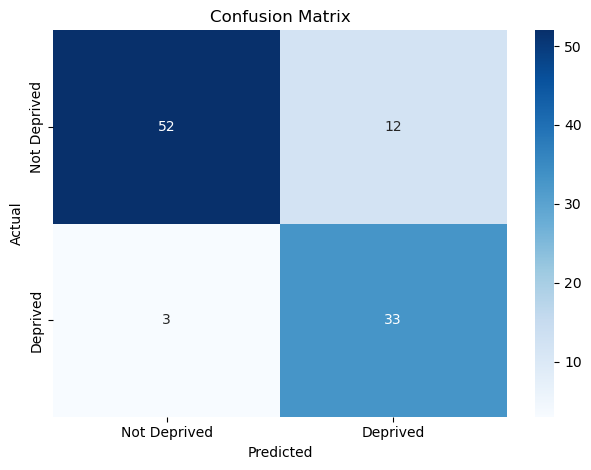

In [37]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Deprived', 'Deprived'],
            yticklabels=['Not Deprived', 'Deprived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()